In [11]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import re
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import emoji
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder
import re
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import * 
from sklearn.model_selection import train_test_split
# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to C:\Users\Bhanu
[nltk_data]     Bisht\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Bhanu
[nltk_data]     Bisht\AppData\Roaming\nltk_data...


In [12]:
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# Check Data Shape
df.shape

(5572, 2)

In [14]:
# Check Null Values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [15]:
# Find Duplicate
df.duplicated().any()

np.True_

In [16]:
# drop Duplicates
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().any()

np.False_

# Distribution of spam vs. ham

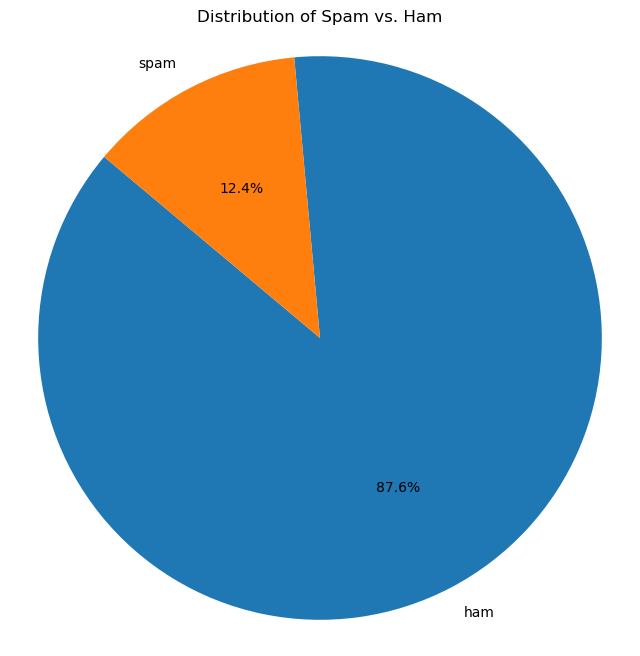

In [18]:
# Calculate the count of each label
category_counts = df['Category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam vs. Ham')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Text Visualization

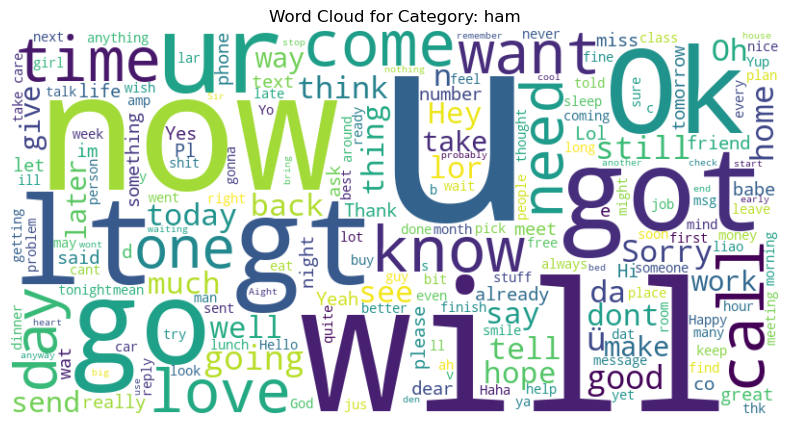

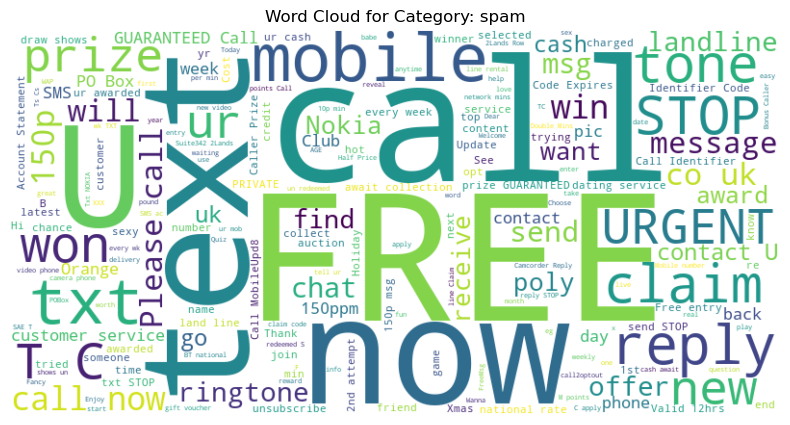

In [19]:
# Iterate through unique categories
for category in df['Category'].unique():
    # Filter the DataFrame for the current category
    filtered_df = df[df['Category'] == category]
    
    # Concatenate all text data for the current category
    text = ' '.join(filtered_df['Message'])
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}')
    plt.axis('off')
    plt.show()

In [20]:
# Encode Category column 
le = LabelEncoder()
df['Category']=le.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Preprocessing

In [22]:
'''1. Lower Casing¶
2. Remove Extra White Spaces
3. Remove HTML Tags
4. Remove URLs
5. Remove Punctuations¶
6. Remove Special Characters
7. Remove Numeric Values
8. Remove Non-alpha Numeric
9. Handling ChatWords
10. Handling StopWords
11. Handling Emojis
12. Stemming
'''

'1. Lower Casing¶\n2. Remove Extra White Spaces\n3. Remove HTML Tags\n4. Remove URLs\n5. Remove Punctuations¶\n6. Remove Special Characters\n7. Remove Numeric Values\n8. Remove Non-alpha Numeric\n9. Handling ChatWords\n10. Handling StopWords\n11. Handling Emojis\n12. Stemming\n'

## LowerCasing Text

In [23]:
# Convert 'Text' column to lowercase
df['Message'] = df['Message'].str.lower()
df.head()

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


## Remove Extra WhiteSpaces

In [25]:
# Remove extra white spaces from the 'Text' column
df['Message'] = df['Message'].str.strip()
df.head()

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


## Remove HTML Tags

In [26]:
# Function to remove HTML tags from text
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# Remove HTML tags from 'Text' column
df['Message'] = df['Message'].apply(remove_html_tags)

In [27]:
df.head()

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


## Remove URLs

In [28]:
# Define a function to remove URLs using regular expressions
def remove_urls(text):
    return re.sub(r'http\S+|www\S+', '', text)

# Apply the function to the 'Text' column
df['Message'] = df['Message'].apply(remove_urls)

In [29]:
df.head()

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


## Remove Punctuations

In [30]:
string.punctuation

# Define the punctuation characters to remove
punctuation = string.punctuation

In [31]:
# Function to remove punctuation from text
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation))

# Apply remove_punctuation function to 'Text' column
df['Message'] = df['Message'].apply(remove_punctuation)

In [32]:
df.head()

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


## Remove Special Characters

In [33]:
def remove_special_characters(text):
    # Define the pattern to match special characters
    pattern = r'[^a-zA-Z0-9\s]'  # Matches any character that is not alphanumeric or whitespace
    
    # Replace special characters with an empty string
    clean_text = re.sub(pattern, '', text)
    
    return clean_text

# Apply the function to the 'Message' column
df['Message'] = df['Message'].apply(remove_special_characters)


## Remove Numeric Values


In [34]:
# Function to remove numeric values from text
def remove_numeric(text):
    return re.sub(r'\d+', '', text)

# Apply the function to the "Message" column
df['Message'] = df['Message'].apply(remove_numeric)


In [35]:
df.head()

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


## Remove Non-alpha Numeric



In [36]:
# Define a function to remove non-alphanumeric characters
def remove_non_alphanumeric(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Apply the function to the "Message" column
df['Message'] = df['Message'].apply(remove_non_alphanumeric)

## Handling ChatWords

In [37]:
# Define a dictionary of chat word mappings
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [38]:
# Function to replace chat words with their full forms
def replace_chat_words(text):
    words = text.split()
    for i, word in enumerate(words):
        if word.lower() in chat_words:
            words[i] = chat_words[word.lower()]
    return ' '.join(words)

# Apply replace_chat_words function to 'Text' column
df['Message'] = df['Message'].apply(replace_chat_words)


## Handling StopWords

In [39]:
# Download NLTK stopwords corpus
nltk.download('stopwords')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stop words from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply remove_stopwords function to 'Text' column
df['Message'] = df['Message'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to C:\Users\Bhanu
[nltk_data]     Bisht\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


## Handling Emojis

In [40]:
# Function to remove emojis from text
def remove_emojis(text):
    return emoji.demojize(text)

# Apply remove_emojis function to 'Text' column
df['Message'] = df['Message'].apply(remove_emojis)

## Stemming

In [41]:
# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

# Apply stemming
df['Message_stemmed'] = df['Message'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))

# Model Building

## Text Vectorization

In [43]:
# Intlize CountVectorizer
cv = CountVectorizer()

# Fitting CountVectorizer on X 
X = cv.fit_transform(df['Message_stemmed']).toarray()
y = df['Category']

## Train Test Split

In [44]:
# Train Test Split 
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

## Call, Fit And Predict The Models

In [45]:
# Logistic Regression with tuned parameters
lr_model = LogisticRegression(C=0.1, solver='liblinear', max_iter=500)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Multinomial Naive Bayes with tuned parameters
mnb_model = MultinomialNB(alpha=0.1)
mnb_model.fit(X_train, y_train)
mnb_pred = mnb_model.predict(X_test)

# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_pred = gnb_model.predict(X_test)

# Support Vector Machines (SVM) with tuned parameters
svm_model = SVC(C=10.0, kernel='rbf', gamma='auto')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Decision Trees with tuned parameters
dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Random Forests with tuned parameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=10)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Gradient Boosting Classifier with tuned parameters
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=5)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# XGBoost Classifier with tuned parameters
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)


# Models Evaluation

In [47]:
# Calculate accuracy, precision and recall for each model
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, average='weighted')
lr_recall = recall_score(y_test, lr_pred, average='weighted')
lr_conf_matrix = confusion_matrix(y_test, lr_pred)

mnb_accuracy = accuracy_score(y_test, mnb_pred)
mnb_precision = precision_score(y_test, mnb_pred, average='weighted')
mnb_recall = recall_score(y_test, mnb_pred, average='weighted')
mnb_conf_matrix = confusion_matrix(y_test, mnb_pred)

gnb_accuracy = accuracy_score(y_test, gnb_pred)
gnb_precision = precision_score(y_test, gnb_pred, average='weighted')
gnb_recall = recall_score(y_test, gnb_pred, average='weighted')
gnb_conf_matrix = confusion_matrix(y_test, gnb_pred)

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
svm_conf_matrix = confusion_matrix(y_test, svm_pred)

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')
dt_conf_matrix = confusion_matrix(y_test, dt_pred)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
gb_conf_matrix = confusion_matrix(y_test, gb_pred)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')
xgb_conf_matrix = confusion_matrix(y_test, xgb_pred)


# Print The Results

In [48]:
# Print precision, recall, and accuracy for each model
print("Logistic Regression:")
print(f"The accuracy score of Logistic Regression is {lr_accuracy}, The Precision Score is {lr_precision},The Recall Score is {lr_recall}")
print(f"The Confusion matrix is \n{lr_conf_matrix}")
print("\n")

print("Multinomial Naive Bayes:")
print(f"The accuracy score of MultinomialNB is {mnb_accuracy}, The Precision Score is {mnb_precision},The Recall Score is {mnb_recall}")
print(f"The Confusion matrix is \n{mnb_conf_matrix}")
print("\n")

print("Gaussian Naive Bayes:")
print(f"The accuracy score of GaussianNB is {gnb_accuracy}, The Precision Score is {gnb_precision},The Recall Score is {gnb_recall}")
print(f"The Confusion matrix is \n{gnb_conf_matrix}")
print("\n")

print("SVM:")
print(f"The accuracy score of SVC is {svm_accuracy}, The Precision Score is {svm_precision},The Recall Score is {svm_recall}")
print(f"The Confusion matrix is \n{svm_conf_matrix}")
print("\n")

print("Decision Trees:")
print(f"The accuracy score of Decision Tree classifier is {dt_accuracy}, The Precision Score is {dt_precision},The Recall Score is {dt_recall}")
print(f"The Confusion matrix is \n{dt_conf_matrix}")
print("\n")

print("Random Forests:")
print(f"The accuracy score of Random Forest classifier is {rf_accuracy}, The Precision Score is {rf_precision},The Recall Score is {rf_recall}")
print(f"The Confusion matrix is \n{rf_conf_matrix}")
print("\n")

print("Gradient Boosting Classifier:")
print(f"The accuracy score of Gradient Boosting Classifier is {gb_accuracy}, The Precision Score is {gb_precision},The Recall Score is {gb_recall}")
print(f"The Confusion matrix is \n{gb_conf_matrix}")
print("\n")

print("XGBoost Classifier:")
print(f"The accuracy score of XGBoost Classifier is {xgb_accuracy}, The Precision Score is {xgb_precision},The Recall Score is {xgb_recall}")
print(f"The Confusion matrix is \n{xgb_conf_matrix}")
print("\n")

Logistic Regression:
The accuracy score of Logistic Regression is 0.9718992248062015, The Precision Score is 0.9724528699938659,The Recall Score is 0.9718992248062015
The Confusion matrix is 
[[895   1]
 [ 28 108]]


Multinomial Naive Bayes:
The accuracy score of MultinomialNB is 0.9563953488372093, The Precision Score is 0.9624374427464473,The Recall Score is 0.9563953488372093
The Confusion matrix is 
[[859  37]
 [  8 128]]


Gaussian Naive Bayes:
The accuracy score of GaussianNB is 0.8691860465116279, The Precision Score is 0.9179176426684793,The Recall Score is 0.8691860465116279
The Confusion matrix is 
[[776 120]
 [ 15 121]]


SVM:
The accuracy score of SVC is 0.8953488372093024, The Precision Score is 0.9066061336051144,The Recall Score is 0.8953488372093024
The Confusion matrix is 
[[896   0]
 [108  28]]


Decision Trees:
The accuracy score of Decision Tree classifier is 0.9534883720930233, The Precision Score is 0.9518701628164753,The Recall Score is 0.9534883720930233
The Con

In [49]:
print(f"Logistic Regression is doing really well with an accuracy of {lr_accuracy} and precision of {lr_precision}, showing that it's the top performer in our email spam detection task.")

Logistic Regression is doing really well with an accuracy of 0.9718992248062015 and precision of 0.9724528699938659, showing that it's the top performer in our email spam detection task.


# Storing The Results in DataFrame

In [50]:
# Create a dictionary with evaluation results
evaluation_data = {
    'Model': ['Logistic Regression', 'MultinomialNB', 'GaussianNB', 'Decision Tree', 'SVM', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'Accuracy': [lr_accuracy, mnb_accuracy, gnb_accuracy, dt_accuracy, svm_accuracy, rf_accuracy, gb_accuracy, xgb_accuracy],
    'Precision': [lr_precision, mnb_precision, gnb_precision, dt_precision, svm_precision, rf_precision, gb_precision, xgb_precision],
   }

# Create a DataFrame
evaluation_df = pd.DataFrame(evaluation_data)

# Sort the DataFrame based on Accuracy and Precision columns in descending order
evaluation_df = evaluation_df.sort_values(by=['Accuracy', 'Precision'], ascending=False)

# Display the sorted DataFrame
print(evaluation_df)


                 Model  Accuracy  Precision
0  Logistic Regression  0.971899   0.972453
6    Gradient Boosting  0.964147   0.963375
7              XGBoost  0.963178   0.962678
1        MultinomialNB  0.956395   0.962437
3        Decision Tree  0.953488   0.951870
5        Random Forest  0.913760   0.921552
4                  SVM  0.895349   0.906606
2           GaussianNB  0.869186   0.917918


# Visualizing The Results

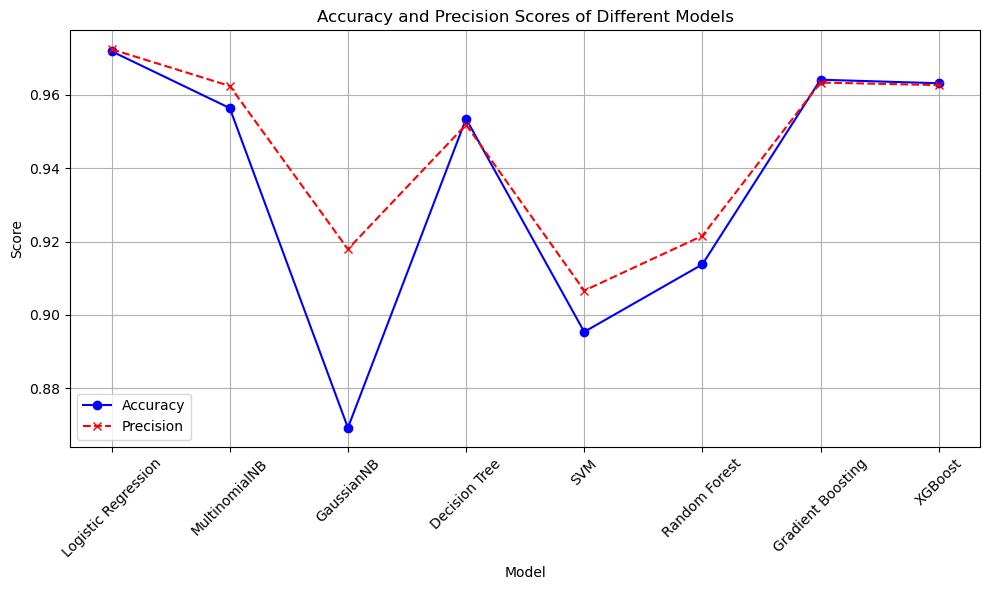

In [51]:
# Define the models and their corresponding accuracy and precision scores
Models = ['Logistic Regression', 'MultinomialNB', 'GaussianNB', 'Decision Tree', 'SVM', 'Random Forest', 'Gradient Boosting', 'XGBoost']
Accuracy = [lr_accuracy, mnb_accuracy, gnb_accuracy, dt_accuracy, svm_accuracy, rf_accuracy, gb_accuracy, xgb_accuracy]
Precision = [lr_precision, mnb_precision, gnb_precision, dt_precision, svm_precision, rf_precision, gb_precision, xgb_precision]

# Plotting
plt.figure(figsize=(10, 6))

# Plot accuracy scores
plt.plot(Models, Accuracy, marker='o', linestyle='-', color='b', label='Accuracy')

# Plot precision scores
plt.plot(Models, Precision, marker='x', linestyle='--', color='r', label='Precision')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Accuracy and Precision Scores of Different Models')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()